# Homework 5
## Mengxiang Jiang

The majority of the code here comes from the [Companion Jupyter notebooks for the book "Deep Learning with Python"](https://github.com/fchollet/deep-learning-with-python-notebooks) by François Chollet, specifically chapter 4.
If the code comes from somewhere else it will have a source linked to the original.\
[Video Link](https://youtu.be/a8EKmQ9npZU)

## Classifying movie reviews: A binary classification example
### The IMDB dataset
**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

2023-02-25 12:38:50.358311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 12:38:50.435930: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


**Decoding reviews back to text**

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preparing the data
**Encoding the integer sequences via multi-hot encoding**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model
**Model definition**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2023-02-25 12:38:53.931757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 12:38:54.212710: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7479 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


**Compiling the model**

In [5]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach
**Setting aside a validation set**

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
print(history_dict.keys())

Epoch 1/20


2023-02-25 12:38:55.500847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-25 12:38:55.503443: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f5a31f8d2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-25 12:38:55.503455: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-02-25 12:38:55.506089: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-25 12:38:55.558272: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 [==============================] - 1s 21ms/step - loss: 0.5915 - accuracy: 0.7471 - val_loss: 0.4671 - val_accuracy: 0.8490
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3916 - accuracy: 0.8765 - val_loss: 0.3576 - val_accuracy: 0.8738
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2918 - accuracy: 0.9039 - val_loss: 0.3071 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2314 - accuracy: 0.9235 - val_loss: 0.2917 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1916 - accuracy: 0.9364 - val_loss: 0.2768 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1641 - accuracy: 0.9466 - val_loss: 0.3017 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1417 - accuracy: 0.9541 - val_loss: 0.2830 - val_accuracy: 0.8851
Epoch 8/20
30/30 [============

**Plotting the training and validation loss**

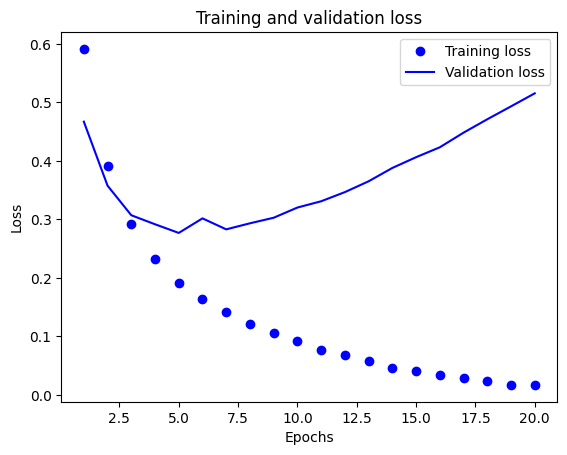

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

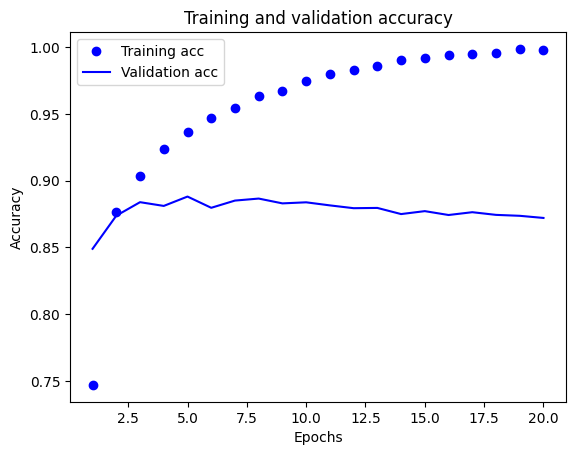

In [9]:
def plot_history_accuracy(history_dict, title):
    plt.clf()
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history_accuracy(history_dict, "Training and validation accuracy")

**4.1.6.1a Retraining a model with one representation layer**

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

one_rep_layer_history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.5124 - accuracy: 0.7859 - val_loss: 0.4046 - val_accuracy: 0.8609
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3358 - accuracy: 0.8979 - val_loss: 0.3361 - val_accuracy: 0.8722
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2656 - accuracy: 0.9156 - val_loss: 0.3006 - val_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2247 - accuracy: 0.9268 - val_loss: 0.3008 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1943 - accuracy: 0.9381 - val_loss: 0.2829 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1743 - accuracy: 0.9445 - val_loss: 0.2743 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1551 - accuracy: 0.9529 - val_loss: 0.2767 - val_accuracy: 0.8868
Epoch 8/20
30/30 [=

**4.1.6.1b Retraining a model with three representation layers**

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

three_rep_layer_history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5963 - accuracy: 0.6841 - val_loss: 0.5207 - val_accuracy: 0.7549
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4069 - accuracy: 0.8821 - val_loss: 0.3642 - val_accuracy: 0.8686
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2670 - accuracy: 0.9147 - val_loss: 0.2987 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2003 - accuracy: 0.9349 - val_loss: 0.3131 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1602 - accuracy: 0.9486 - val_loss: 0.2896 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1331 - accuracy: 0.9559 - val_loss: 0.3010 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1019 - accuracy: 0.9709 - val_loss: 0.4026 - val_accuracy: 0.8566
Epoch 8/20
30/30 [=

**4.1.6.2a Retraining a model with fewer (8) units**

In [12]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

fewer_units_history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6255 - accuracy: 0.6037 - val_loss: 0.5756 - val_accuracy: 0.7949
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.5234 - accuracy: 0.7989 - val_loss: 0.5139 - val_accuracy: 0.7918
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4636 - accuracy: 0.8651 - val_loss: 0.4789 - val_accuracy: 0.8247
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4184 - accuracy: 0.9053 - val_loss: 0.4477 - val_accuracy: 0.8644
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3817 - accuracy: 0.9265 - val_loss: 0.4293 - val_accuracy: 0.8729
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3483 - accuracy: 0.9417 - val_loss: 0.4143 - val_accuracy: 0.8749
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3180 - accuracy: 0.9533 - val_loss: 0.3992 - val_accuracy: 0.8798
Epoch 8/20
30/30 [

**4.1.6.2a Retraining a model with more (32) units**

In [13]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

more_units_history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5105 - accuracy: 0.7717 - val_loss: 0.3630 - val_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2955 - accuracy: 0.8964 - val_loss: 0.3288 - val_accuracy: 0.8667
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2251 - accuracy: 0.9187 - val_loss: 0.2887 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1830 - accuracy: 0.9347 - val_loss: 0.2807 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1537 - accuracy: 0.9451 - val_loss: 0.2913 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1255 - accuracy: 0.9583 - val_loss: 0.3228 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1036 - accuracy: 0.9663 - val_loss: 0.3485 - val_accuracy: 0.8715
Epoch 8/20
30/30 [=

**4.1.6.3 Retraining a model using mse loss**

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

mse_loss_history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1915 - accuracy: 0.7626 - val_loss: 0.1459 - val_accuracy: 0.8357
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1132 - accuracy: 0.8766 - val_loss: 0.1104 - val_accuracy: 0.8597
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0849 - accuracy: 0.9035 - val_loss: 0.0959 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0686 - accuracy: 0.9221 - val_loss: 0.0878 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0591 - accuracy: 0.9339 - val_loss: 0.0863 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0512 - accuracy: 0.9441 - val_loss: 0.0859 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0448 - accuracy: 0.9540 - val_loss: 0.0866 - val_accuracy: 0.8812
Epoch 8/20
30/30 [=

**4.1.6.4 Retraining a model using tanh activation**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

tanh_activation_history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4986 - accuracy: 0.7857 - val_loss: 0.3732 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2971 - accuracy: 0.8969 - val_loss: 0.2924 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2166 - accuracy: 0.9237 - val_loss: 0.2912 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1705 - accuracy: 0.9399 - val_loss: 0.2746 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1378 - accuracy: 0.9513 - val_loss: 0.2910 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1108 - accuracy: 0.9639 - val_loss: 0.3585 - val_accuracy: 0.8677
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0925 - accuracy: 0.9692 - val_loss: 0.3458 - val_accuracy: 0.8799
Epoch 8/20
30/30 [=

**accuracy plot comparison**

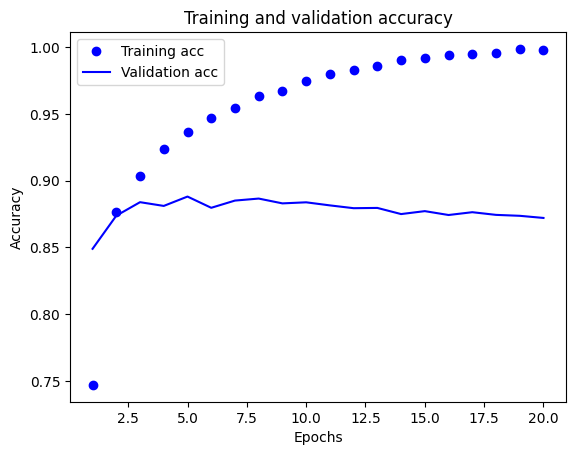

In [16]:
plot_history_accuracy(history_dict, "Training and validation accuracy")

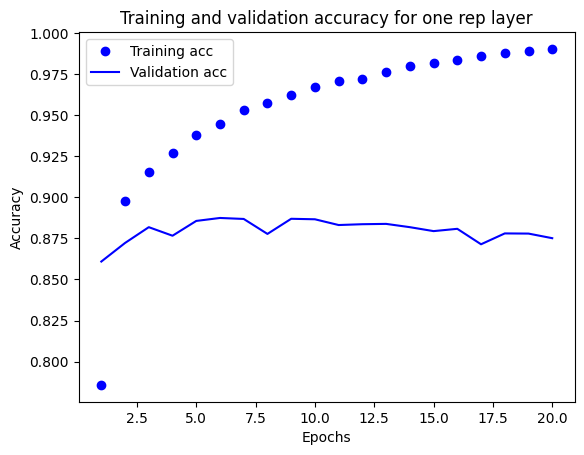

In [17]:
plot_history_accuracy(one_rep_layer_history_dict, "Training and validation accuracy for one rep layer")

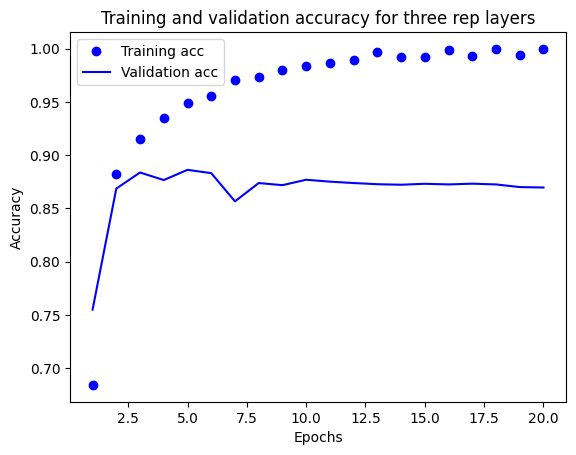

In [18]:
plot_history_accuracy(three_rep_layer_history_dict, "Training and validation accuracy for three rep layers")

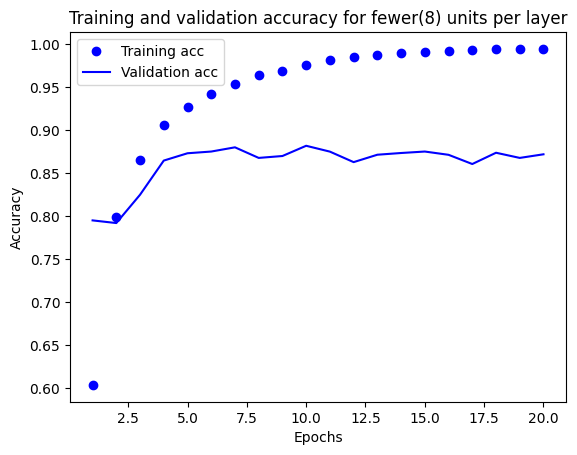

In [19]:
plot_history_accuracy(fewer_units_history_dict, "Training and validation accuracy for fewer(8) units per layer")

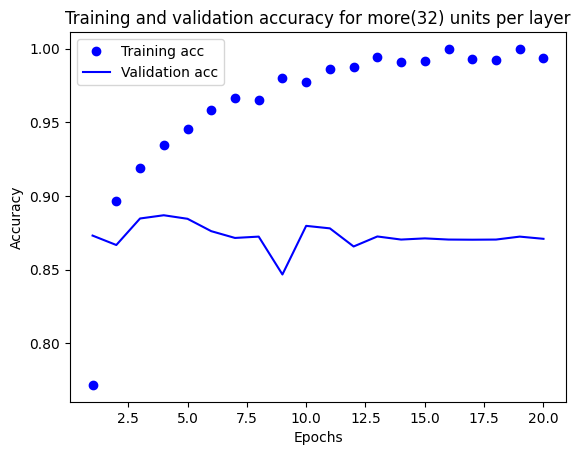

In [20]:
plot_history_accuracy(more_units_history_dict, "Training and validation accuracy for more(32) units per layer")

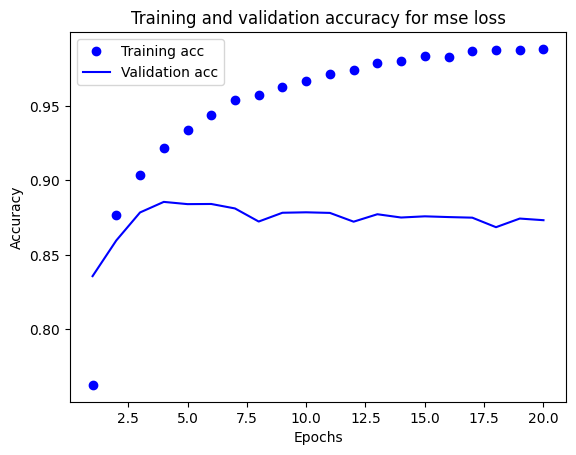

In [21]:
plot_history_accuracy(mse_loss_history_dict, "Training and validation accuracy for mse loss")

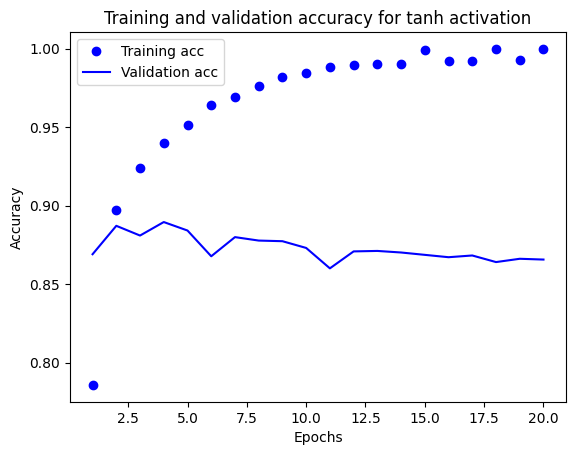

In [22]:
plot_history_accuracy(tanh_activation_history_dict, "Training and validation accuracy for tanh activation")

**Conclusions on Only One Representation Layer**

The validation accuracy took two more epoch to peak, suggesting the model converges slower with fewer layers. Peak accuracy seems to be similar to original two layers model (88 to 89%).

**Conclusions on Three Representation Layers**

The validation accuracy took about the same number of epochs to peak, suggesting the model converges about the same as two representation layers. Peak accuracy seems to be similar to original two layers model (88 to 89%).

**Conclusions on Fewer(8) Units Per Layer**

The validation accuracy took two more epochs to peak, suggesting the model converges slower with fewer units per layer. Peak accuracy seems to be similar to original 16 units per layer model (88 to 89%).

**Conclusions on More(32) Units Per Layer**

The validation accuracy took one fewer epoch to peak, suggesting the model converges slightly faster with more units per layer. Peak accuracy seems to be similar to original 16 units per layer model (88 to 89%).

**Conclusions on MSE loss**

The validation accuracy took one fewer epoch to peak, suggesting the model converges slightly faster compared to binary cross entropy loss. Peak accuracy seems to be similar to original (88 to 89%).

**Conclusions on Tanh Activation**

The validation accuracy took one fewer epoch to peak, suggesting the model converges slightly faster compared to relu activation. Peak accuracy seems to be similar to original (88 to 89%).

## Classifying newswires: A multiclass classification example
### The Reuters dataset
**Loading the Reuters dataset**

In [23]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

**Decoding newswires back to text**

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### Preparing the data
**Encoding the input data**

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

**Built-in way in keras**

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model
**Model definition**

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach
**Setting aside a validation set**

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

Epoch 1/20
16/16 [==============================] - 1s 12ms/step - loss: 2.7532 - accuracy: 0.4642 - val_loss: 1.8931 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 1.5864 - accuracy: 0.6591 - val_loss: 1.4232 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 1.2164 - accuracy: 0.7344 - val_loss: 1.2378 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9984 - accuracy: 0.7844 - val_loss: 1.1174 - val_accuracy: 0.7390
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.8354 - accuracy: 0.8166 - val_loss: 1.0379 - val_accuracy: 0.7590
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.8468 - val_loss: 0.9824 - val_accuracy: 0.7830
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.8738 - val_loss: 0.9391 - val_accuracy: 0.7940
Epoch 8/20
16/16 [=

**Plotting the training and validation loss**

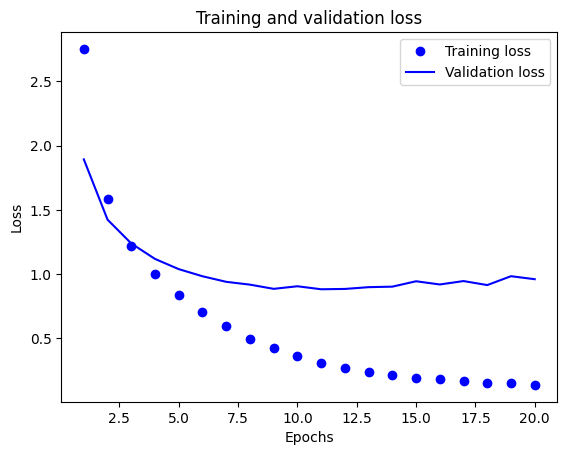

In [32]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

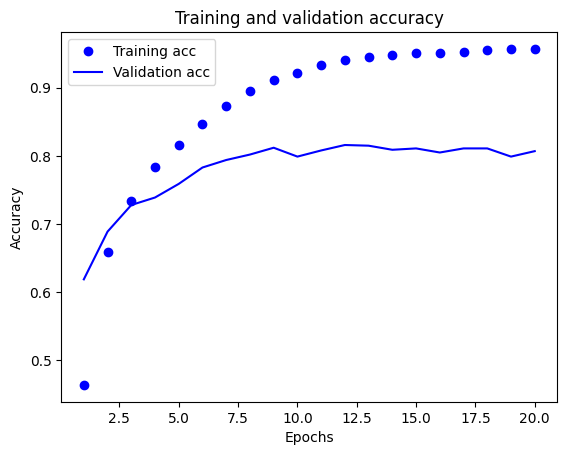

In [33]:
plot_history_accuracy(history_dict, "Training and validation accuracy")

**4.2.8.1a Retraining a model using fewer (32) units per layer**

In [34]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

fewer_units_history_dict = history.history

Epoch 1/20
16/16 [==============================] - 1s 12ms/step - loss: 3.2101 - accuracy: 0.4783 - val_loss: 2.4609 - val_accuracy: 0.5860
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 2.0638 - accuracy: 0.6208 - val_loss: 1.7702 - val_accuracy: 0.6280
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.5487 - accuracy: 0.6840 - val_loss: 1.4814 - val_accuracy: 0.6720
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2919 - accuracy: 0.7225 - val_loss: 1.3179 - val_accuracy: 0.7180
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 1.1260 - accuracy: 0.7587 - val_loss: 1.2316 - val_accuracy: 0.7350
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9958 - accuracy: 0.7855 - val_loss: 1.1593 - val_accuracy: 0.7500
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8875 - accuracy: 0.8118 - val_loss: 1.1129 - val_accuracy: 0.7640
Epoch 8/20
16/16 [=

**4.2.8.1b Retraining a model using more (128) units per layer**

In [35]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

more_units_history_dict = history.history

Epoch 1/20
16/16 [==============================] - 1s 12ms/step - loss: 2.3357 - accuracy: 0.5436 - val_loss: 1.4787 - val_accuracy: 0.6790
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2667 - accuracy: 0.7221 - val_loss: 1.1808 - val_accuracy: 0.7390
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9622 - accuracy: 0.7880 - val_loss: 1.0659 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.7484 - accuracy: 0.8344 - val_loss: 0.9534 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6001 - accuracy: 0.8659 - val_loss: 0.8904 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4727 - accuracy: 0.8989 - val_loss: 0.9627 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.3776 - accuracy: 0.9184 - val_loss: 0.8465 - val_accuracy: 0.8080
Epoch 8/20
16/16 [=

**4.2.8.2a Retraining a model using one hidden layer**

In [36]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

one_layer_history_dict = history.history

Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 2.7254 - accuracy: 0.5427 - val_loss: 1.9440 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.6101 - accuracy: 0.6956 - val_loss: 1.4243 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2004 - accuracy: 0.7560 - val_loss: 1.2110 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9684 - accuracy: 0.8007 - val_loss: 1.0764 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8075 - accuracy: 0.8356 - val_loss: 1.0006 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6837 - accuracy: 0.8627 - val_loss: 0.9342 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5851 - accuracy: 0.8845 - val_loss: 0.8937 - val_accuracy: 0.8130
Epoch 8/20
16/16 [=

**4.2.8.2b Retraining a model using three hidden layers**

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

three_layer_history_dict = history.history

Epoch 1/20
16/16 [==============================] - 1s 13ms/step - loss: 2.8697 - accuracy: 0.3785 - val_loss: 1.8946 - val_accuracy: 0.5500
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.6447 - accuracy: 0.6361 - val_loss: 1.4431 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.2749 - accuracy: 0.7146 - val_loss: 1.2413 - val_accuracy: 0.7130
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 1.0487 - accuracy: 0.7554 - val_loss: 1.1233 - val_accuracy: 0.7310
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8677 - accuracy: 0.7975 - val_loss: 1.0585 - val_accuracy: 0.7630
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.7254 - accuracy: 0.8351 - val_loss: 1.0011 - val_accuracy: 0.7720
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5904 - accuracy: 0.8682 - val_loss: 0.9698 - val_accuracy: 0.7990
Epoch 8/20
16/16 [=

**accuracy plot comparison**

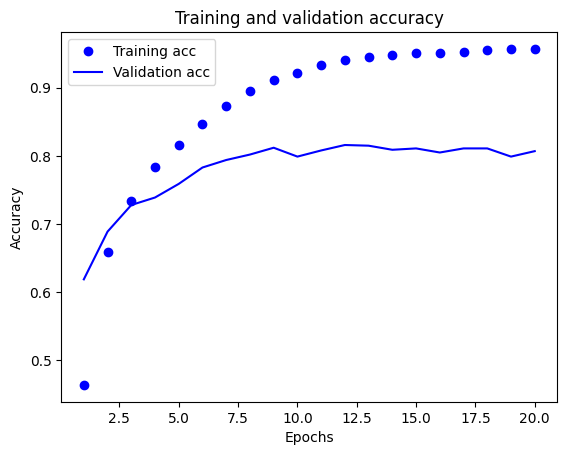

In [38]:
plot_history_accuracy(history_dict, "Training and validation accuracy")

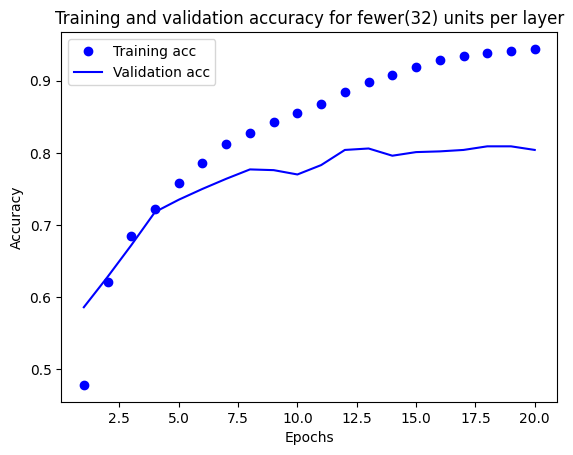

In [47]:
plot_history_accuracy(fewer_units_history_dict, "Training and validation accuracy for fewer(32) units per layer")

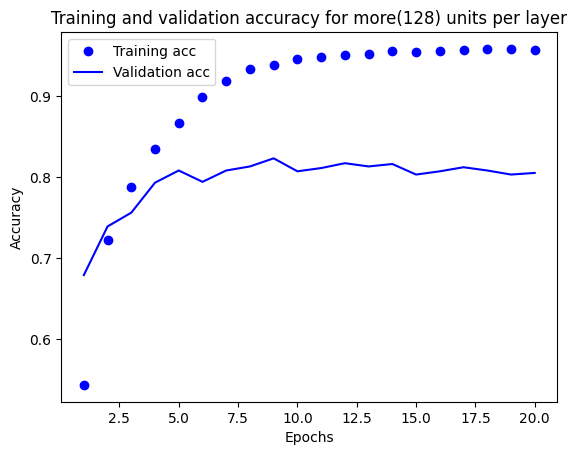

In [48]:
plot_history_accuracy(more_units_history_dict, "Training and validation accuracy for more(128) units per layer")

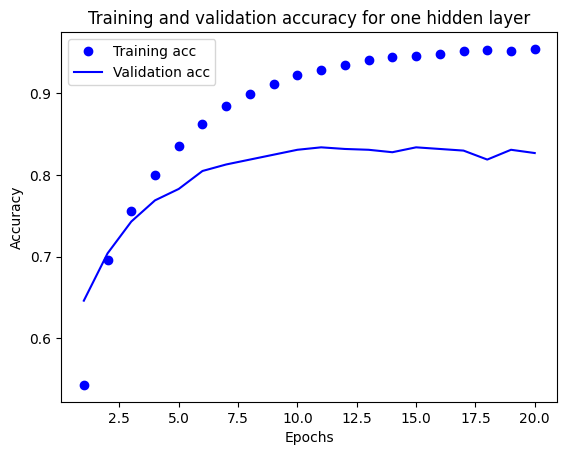

In [49]:
plot_history_accuracy(one_layer_history_dict, "Training and validation accuracy for one hidden layer")

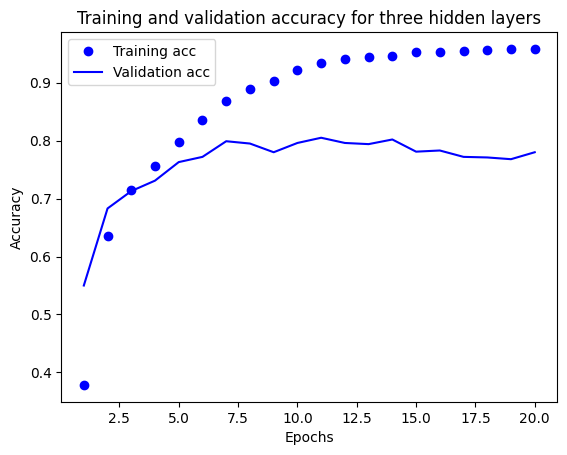

In [50]:
plot_history_accuracy(three_layer_history_dict, "Training and validation accuracy for three hidden layers")

**Conclusions on fewer (32) units per layer**

The validation accuracy took one more epoch to peak, suggesting the model converges slightly slower with fewer units per layer. Peak accuracy seems to be slightly lower(80 vs 81%).

**Conclusions on more (128) units per layer**

The validation accuracy took three fewer epochs to peak, suggesting the model converges faster with more units per layer. Peak accuracy seems to be slightly higher(82 vs 81%).

**Conclusions on single hidden layer**

The validation accuracy took three more epochs to peak, suggesting the model converges slower with only a single hidden layer. Surprisingly, peak accuracy seems to be higher(83 vs 81%).

**Conclusions on three hidden layers**

The validation accuracy took one fewer epochs to peak, suggesting the model converges slightly faster with three hidden layers. Peak accuracy seems to be slightly lower(80 vs 81%).

## Predicting house prices: A regression example
### The Boston Housing Price dataset
**Loading the Boston housing dataset**

In [51]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


### Preparing the data
**Normalizing the data**

In [52]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model
**Model definition**

In [53]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation
**K-fold validation**

In [95]:
def perform_k_fold_validation(k, num_epochs):
    num_val_samples = len(train_data) // k
    all_scores = []
    for i in range(k):
        print(f"Processing fold #{i}")
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]],
            axis=0)
        model = build_model()
        model.fit(partial_train_data, partial_train_targets,
                epochs=num_epochs, batch_size=16, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
    return model, all_scores

model, all_scores_4_fold = perform_k_fold_validation(4, 100)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Saving the validation logs at each fold**

In [96]:
def perform_k_fold_mae_histories(k, num_epochs):
    num_val_samples = len(train_data) // k
    all_mae_histories = []
    for i in range(k):
        print(f"Processing fold #{i}")
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]],
            axis=0)
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=16, verbose=0)
        mae_history = history.history["val_mae"]
        all_mae_histories.append(mae_history)
    return model, all_mae_histories

model, all_mae_histories_4_fold = perform_k_fold_mae_histories(4, 500)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [97]:
average_mae_history_4_fold = [
    np.mean([x[i] for x in all_mae_histories_4_fold]) for i in range(500)]

**Plotting validation scores**

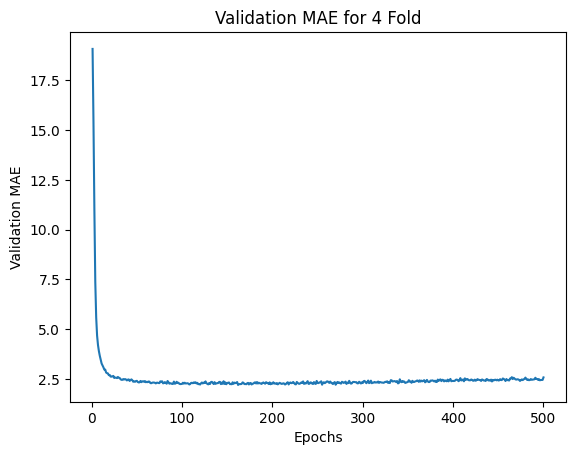

In [98]:
plt.plot(range(1, len(average_mae_history_4_fold) + 1), average_mae_history_4_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE for 4 Fold")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

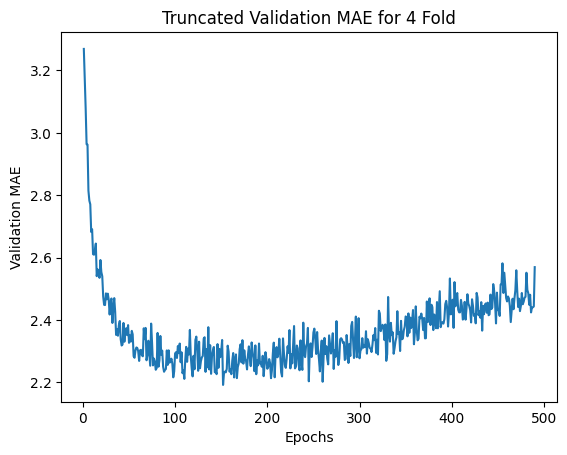

In [99]:
truncated_mae_history_4_fold = average_mae_history_4_fold[10:]
plt.plot(range(1, len(truncated_mae_history_4_fold) + 1), truncated_mae_history_4_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Truncated Validation MAE for 4 Fold")
plt.show()

**Training the final model**

In [103]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=150, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 13.8616 - mae: 2.3806
2.380635976791382


**10 fold cross validation**

In [104]:
model, all_mae_histories_10_fold = perform_k_fold_mae_histories(10, 150)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4
Processing fold #5
Processing fold #6
Processing fold #7
Processing fold #8
Processing fold #9


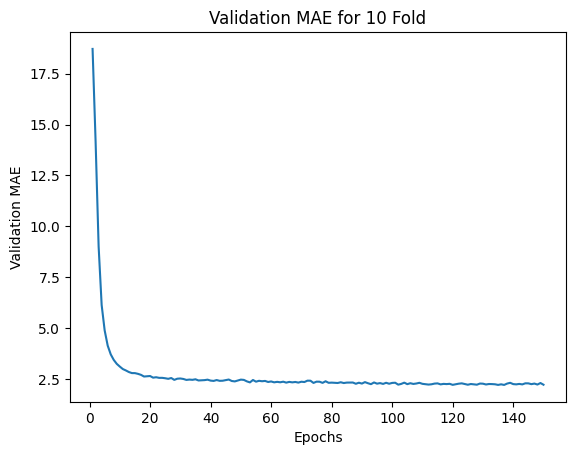

In [105]:
average_mae_history_10_fold = [
    np.mean([x[i] for x in all_mae_histories_10_fold]) for i in range(150)]

plt.plot(range(1, len(average_mae_history_10_fold) + 1), average_mae_history_10_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE for 10 Fold")
plt.show()

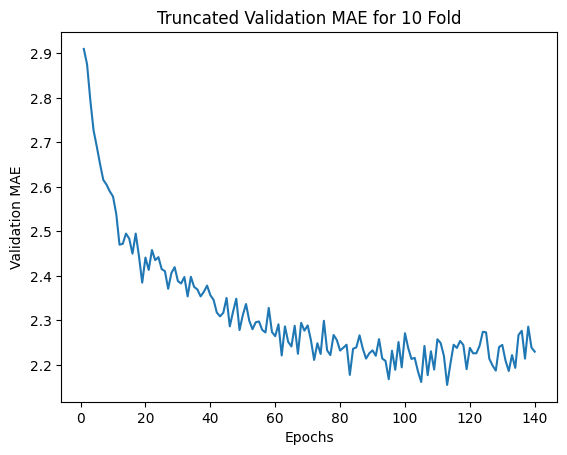

In [93]:
truncated_mae_history_10_fold = average_mae_history_10_fold[10:]
plt.plot(range(1, len(truncated_mae_history_10_fold) + 1), truncated_mae_history_10_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Truncated Validation MAE for 10 Fold")
plt.show()

In [106]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 13.9724 - mae: 2.4353
2.4352550506591797


**Conclusions on 10 fold**

It seems to take 30 fewer epochs to reach the minimum MAE, suggesting the model converges slightly faster compared to 4 fold. Since the model evaluated is the one at epoch 150 rather than the optimal one at around epoch 120, the MAE is slightly higher than the 4 fold model (2.43 vs 2.38).

**20 fold cross validation**

In [107]:
model, all_mae_histories_20_fold = perform_k_fold_mae_histories(20, 150)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4
Processing fold #5
Processing fold #6
Processing fold #7
Processing fold #8
Processing fold #9
Processing fold #10
Processing fold #11
Processing fold #12
Processing fold #13
Processing fold #14
Processing fold #15
Processing fold #16
Processing fold #17
Processing fold #18
Processing fold #19


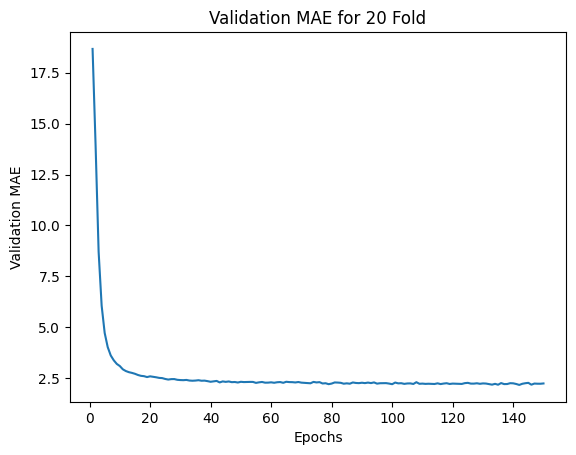

In [109]:
average_mae_history_20_fold = [
    np.mean([x[i] for x in all_mae_histories_20_fold]) for i in range(150)]

plt.plot(range(1, len(average_mae_history_20_fold) + 1), average_mae_history_20_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE for 20 Fold")
plt.show()

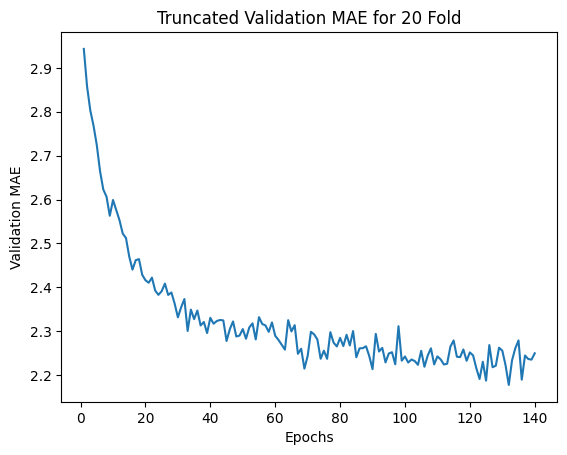

In [110]:
truncated_mae_history_20_fold = average_mae_history_20_fold[10:]
plt.plot(range(1, len(truncated_mae_history_20_fold) + 1), truncated_mae_history_20_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Truncated Validation MAE for 20 Fold")
plt.show()

In [111]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 1ms/step - loss: 16.1363 - mae: 2.5798
2.579789638519287


**Conclusions on 20 fold**

It seems to take 10 fewer epochs to reach the minimum MAE, suggesting the model converges slightly faster compared to 4 fold. Since the model evaluated is the one at epoch 150 rather than the optimal one at around epoch 140, the MAE is higher than the 4 fold model (2.58 vs 2.38).

**MAE as Loss Function**

In [114]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mae", metrics=["mae"])
    return model

In [115]:
model, all_mae_histories_4_fold = perform_k_fold_mae_histories(4, 150)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


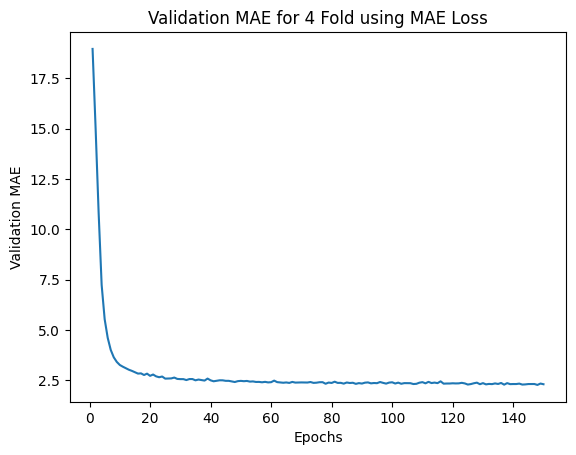

In [116]:
average_mae_history_4_fold = [
    np.mean([x[i] for x in all_mae_histories_4_fold]) for i in range(150)]

plt.plot(range(1, len(average_mae_history_4_fold) + 1), average_mae_history_4_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation MAE for 4 Fold using MAE Loss")
plt.show()

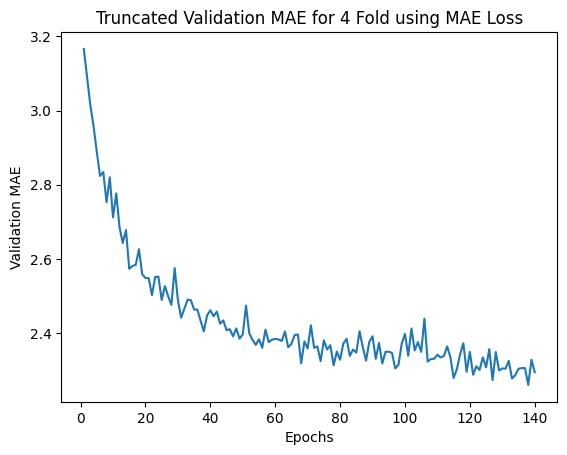

In [117]:
truncated_mae_history_4_fold = average_mae_history_4_fold[10:]
plt.plot(range(1, len(truncated_mae_history_4_fold) + 1), truncated_mae_history_4_fold)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Truncated Validation MAE for 4 Fold using MAE Loss")
plt.show()

In [118]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 1ms/step - loss: 2.8244 - mae: 2.8244
2.8243579864501953


**Conclusions on MAE Loss**

It seems to take about the same number of epochs to reach the minimum MAE, suggesting the model converges similar to MSE loss. However the validation MAE is much higher than that of using MSE loss (2.82 vs 2.38)